<a href="https://colab.research.google.com/github/shindejayesh987/Neural-Networks-Zero-to-Hero-By-Andrej-Karpathy/blob/main/build_makemore_mlp_yay_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
from os import initgroups
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3
X,y = [],[]

for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        y.append(ix)
        #print(''.join(itos[i] for i in context), '-->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
y = torch.tensor(y)

In [ ]:
X.shape, y.shape  , X.dtype, y.dtype

(torch.Size([228146, 3]), torch.Size([228146]), torch.int64, torch.int64)

In [ ]:
C= torch.randn((27,2))

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
w1 = torch.randn((6,100))
b1 = torch.randn(100)

In [ ]:
torch.cat([emb[:,0,:] , emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [ ]:
emb.shape

torch.Size([32, 3, 2])

In [ ]:
emb.view(32,6).shape

torch.Size([32, 6])

In [ ]:
h = torch.tanh(emb.view(-1,6) @ w1 + b1)
h

tensor([[ 0.9716, -0.9520,  0.8670,  ..., -0.7570,  0.9379,  0.4714],
        [ 0.9633, -0.8748,  0.9328,  ..., -0.8061,  0.8846,  0.6431],
        [ 0.8841,  0.9955,  1.0000,  ..., -0.2135, -0.5072,  0.6304],
        ...,
        [-0.9824,  0.0110, -0.2900,  ..., -0.9798,  0.9997,  0.9988],
        [-0.8210, -0.9938, -1.0000,  ..., -0.9900,  0.9534, -0.6822],
        [ 0.8102, -0.9956, -0.9540,  ..., -0.9669, -0.1957, -0.9932]])

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
w2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @ w2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
probs = counts / counts.sum(1,keepdim=True)

In [ ]:
probs.shape


torch.Size([32, 27])

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
loss = probs[torch.arange(32),y].log().mean()
loss

tensor(-13.4759)

In [ ]:
#training split , validation split , test split
#80% - 10% - 10%

In [ ]:
# build the dataset
#block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, ytr = build_dataset(words[:n1])
Xdev, ydev = build_dataset(words[n1:n2])
Xte, yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [ ]:
Xtr.shape,ytr.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
w1 = torch.randn(6,100, generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn(100,27, generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C,w1,b1,w2,b2]


In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
# lri = []
# lossi = []


# for i in range(1000):

#   #minibatch
#   ix = torch.randint(0,Xtr.shape[0],(32,))
#   # X_batch = X[ix]
#   # y_batch = y[ix]
#   #forward pass
#   emb = C[Xtr[ix]]
#   h = torch.tanh(emb.view(-1,6) @ w1 + b1)
#   logits = h @ w2 + b2
#   loss = F.cross_entropy(logits,ytr[ix])
#   print(loss)
#   #backward pass
#   for p in parameters:
#       p.grad = None
#   loss.backward()
#   #update
#   lr = lrs[i]
#   lr  = 0.1
#   for p in parameters:
#       p.data += -lr * p.grad

#   #track stats
#   lri.append(lre[i])
#   lossi.append(loss.item())


# # print(loss.item())







for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ w1 + b1) # (32, 200)
  logits = h @ w2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

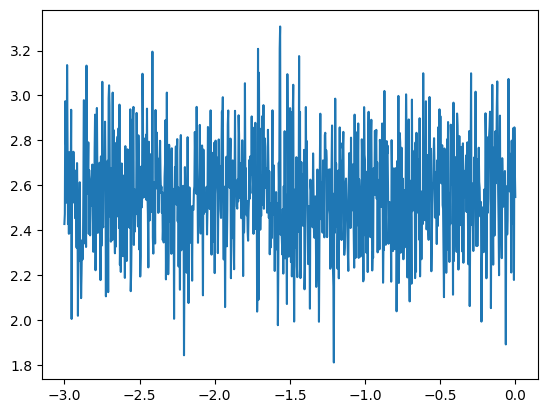

In [ ]:
plt.plot(lri,lossi)

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,6) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits,ytr)
loss

tensor(2.5377, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,6) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits,ydev)
loss

tensor(2.5253, grad_fn=<NllLossBackward0>)

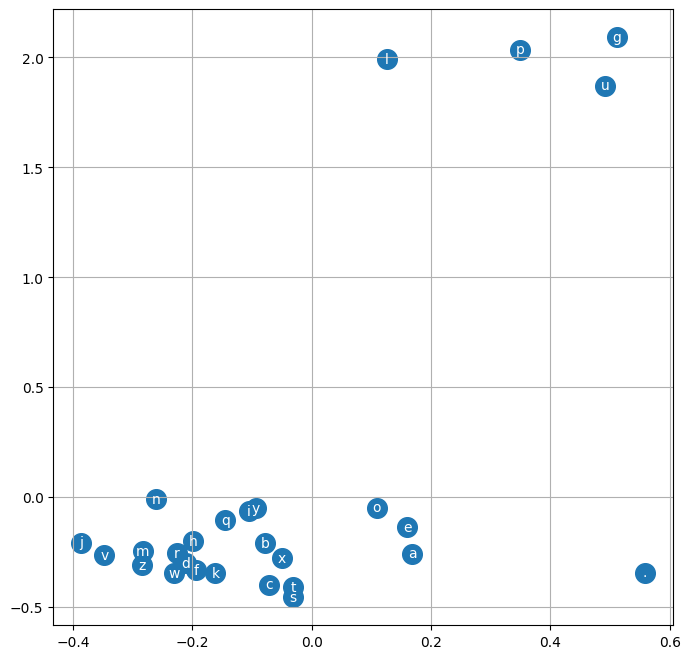

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')
